# P06: Goodness-of-fit and hypothesis testing

## Problem 1: Fitting stellar luminosities

Let us assume that we measure the luminosity as a function of time for four samples of stars. Each sample contains 100 stars and we measure their luminosity at 50 times each. The recorded values for the stellar luminosities for four samples are in the `data` directory and designated `starcat_1.npy`, `starcat_2.npy`, `starcat_3.npy` and `starcat_4.npy`. The values are given in units of $L_\odot$.

Our hypothesis is that all stars in these four catalogs are non-variable, i.e. their luminosity does not vary as a function of time, and that the observed luminosities are normally distributed with a standard deviation of $\sigma(L_*)=0.1L_*$.

(i) Test if the data is consistent with this hypothesis by comparing the data to model predictions and computing the $\chi^2$ values of the observed data with respect to the assumed model.

(ii) Try to diagnose the reasons for the discrepancies found (if any).

In the next three problems, we want to analyze seven astrophysical catalogs containing the magnitudes of galaxies in three different wavelength bands. The goal is to find out if some of the datasets are not consistent with each other.

In [3]:
import numpy as np
from scipy.stats import chi2

# Daten laden
starcat_1 = np.load('data/starcat_1.npy')
starcat_2 = np.load('data/starcat_2.npy')
starcat_3 = np.load('data/starcat_3.npy')
starcat_4 = np.load('data/starcat_4.npy')

# Annahmen
sigma = 0.1  # Standardabweichung
expected_std = np.std(np.concatenate([starcat_1, starcat_2, starcat_3, starcat_4]))  # Erwartete Standardabweichung

# Berechnung der Chi-Quadrat-Werte
chi_squared_1 = np.sum(((starcat_1 - np.mean(starcat_1)) / expected_std) ** 2)
chi_squared_2 = np.sum(((starcat_2 - np.mean(starcat_2)) / expected_std) ** 2)
chi_squared_3 = np.sum(((starcat_3 - np.mean(starcat_3)) / expected_std) ** 2)
chi_squared_4 = np.sum(((starcat_4 - np.mean(starcat_4)) / expected_std) ** 2)

# Freiheitsgrade (Anzahl der Messungen - 1)
df = len(starcat_1.flatten()) - 1

# Chi-Quadrat-Kritischer Wert für Signifikanzniveau 0.05
critical_value = chi2.ppf(0.95, df)

# Ergebnisse ausgeben
print(f'Chi-Quadrat-Wert für Katalog 1: {chi_squared_1}')
print(f'Chi-Quadrat-Wert für Katalog 2: {chi_squared_2}')
print(f'Chi-Quadrat-Wert für Katalog 3: {chi_squared_3}')
print(f'Chi-Quadrat-Wert für Katalog 4: {chi_squared_4}')

print(f'Kritischer Wert bei {df} Freiheitsgraden: {critical_value}')

# Überprüfen, ob die Hypothese abgelehnt wird
if chi_squared_1 > critical_value or chi_squared_2 > critical_value or chi_squared_3 > critical_value or chi_squared_4 > critical_value:
    print('Die Hypothese wird abgelehnt. Die Daten sind nicht konsistent mit der Annahme nicht-variabler Leuchtkräfte.')
else:
    print('Die Hypothese wird nicht abgelehnt. Die Daten sind konsistent mit der Annahme nicht-variabler Leuchtkräfte.')


Chi-Quadrat-Wert für Katalog 1: 2933.207778252206
Chi-Quadrat-Wert für Katalog 2: 4442.444589595649
Chi-Quadrat-Wert für Katalog 3: 6684.106536097969
Chi-Quadrat-Wert für Katalog 4: 5842.122374509405
Kritischer Wert bei 4999 Freiheitsgraden: 5164.598068527191
Die Hypothese wird abgelehnt. Die Daten sind nicht konsistent mit der Annahme nicht-variabler Leuchtkräfte.


## Problem 2: Magnitude distributions and colors

Use `astropy.io.fits` to load the six fits files called `magnitudes0.fits` to `magnitudes5.fits`. Find out how to extract the magnitudes of the galaxies in each of the files in $g$, $r$, and $i$ bands. Write a function that takes the fits object and returns the colors:
$$C_1 =  \mathrm{mag}_g - \mathrm{mag}_r$$
$$C_2 =  \mathrm{mag}_i - \mathrm{mag}_r$$
Plot histograms of the colors and the color-color plane of each of the catalogs. 

Can you spot the non-consistent catalogs by eye?

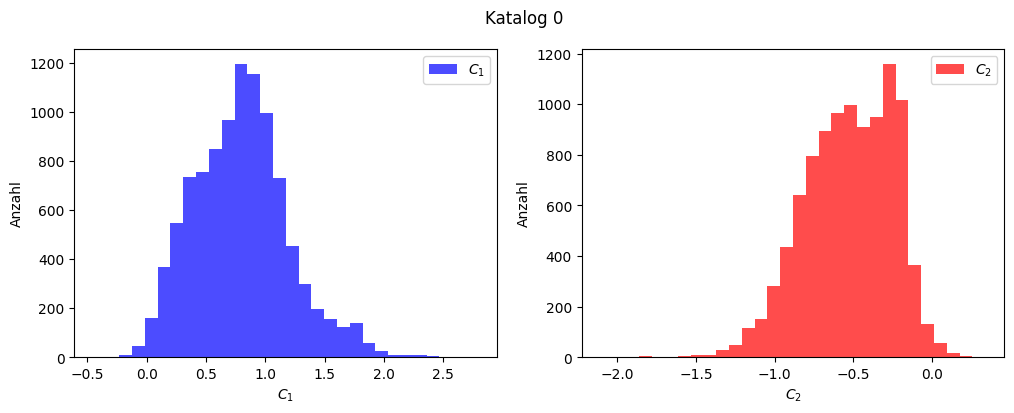

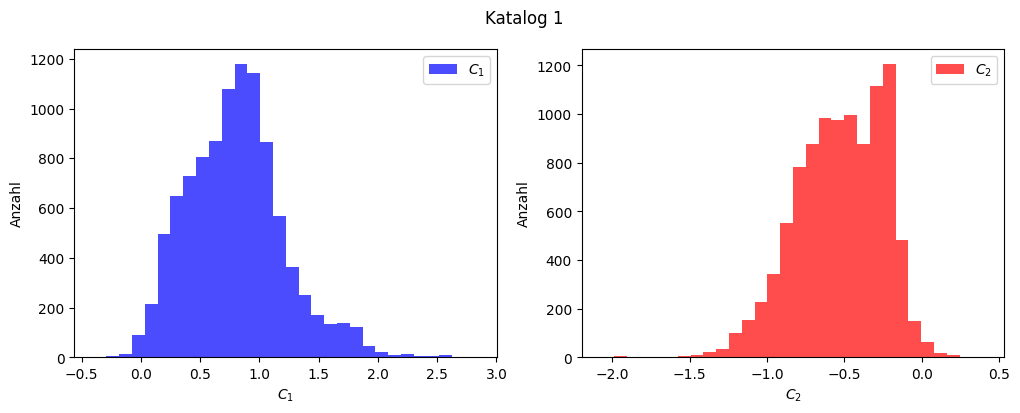

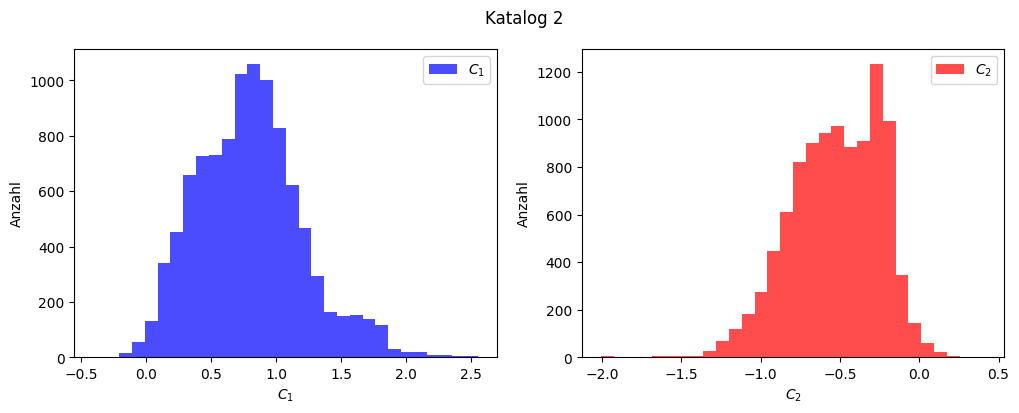

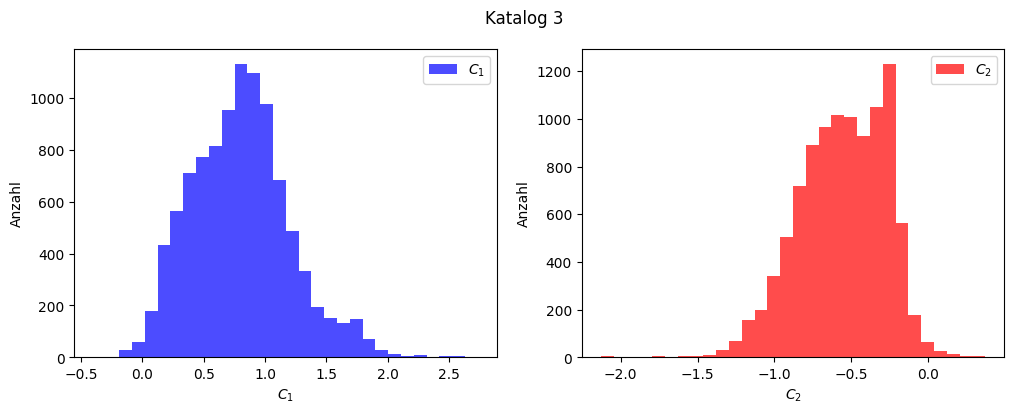

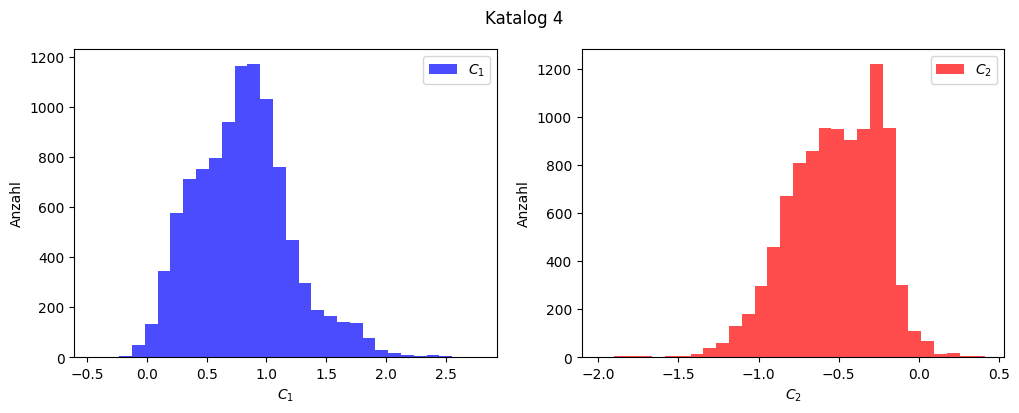

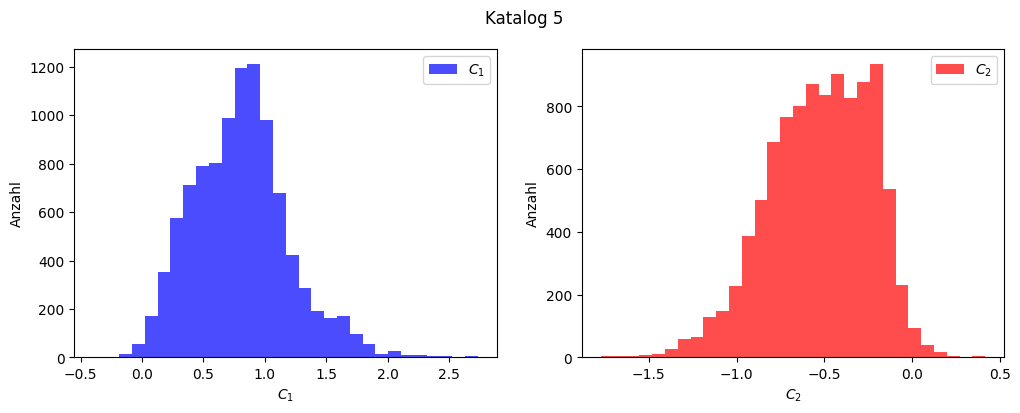

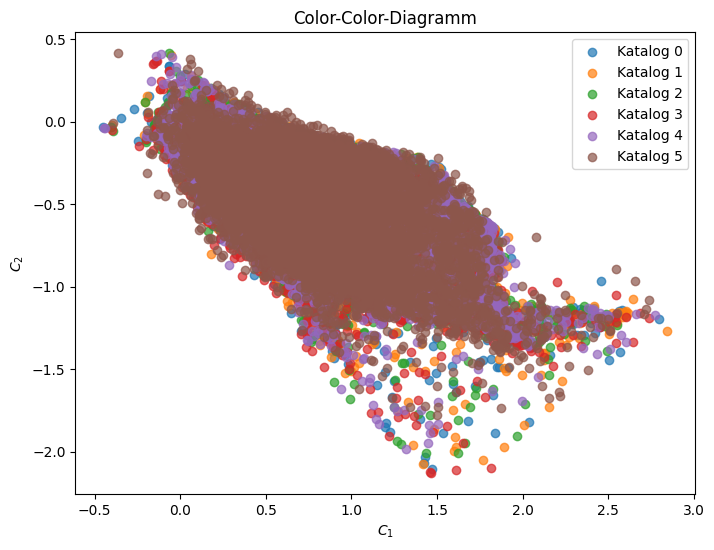

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

def extract_colors(fits_file):
    # Öffnen der FITS-Datei
    with fits.open(fits_file) as hdul:
        # Extrahieren der Magnituden in den Bändern g, r, i
        data =  np.array(hdul[1].data)

        mag_g = np.zeros(len(data))
        mag_r = np.zeros(len(data))
        mag_i = np.zeros(len(data))
        
        for i in range(len(data)):
            mag_g[i] = data[i][0]
            mag_r[i] = data[i][1]
            mag_i[i] = data[i][2]
        
        # Berechnen der Farben
        color1 = mag_g - mag_r
        color2 = mag_i - mag_r

    return color1, color2

# Laden der Daten und Extrahieren der Farben
colors = []
for i in range(6):
    fits_file = f'data/magnitudes{i}.fits'
    color1, color2 = extract_colors(fits_file)
    colors.append((color1, color2))

# Plot Histogramme der Farben
for i in range(6):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(colors[i][0], bins=30, color='blue', alpha=0.7, label='$C_1$')
    plt.xlabel('$C_1$')
    plt.ylabel('Anzahl')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(colors[i][1], bins=30, color='red', alpha=0.7, label='$C_2$')
    plt.xlabel('$C_2$')
    plt.ylabel('Anzahl')
    plt.legend()

    plt.suptitle(f'Katalog {i}')
    plt.show()

# Plot Color-Color-Diagramm
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.scatter(colors[i][0], colors[i][1], label=f'Katalog {i}', alpha=0.7)

plt.xlabel('$C_1$')
plt.ylabel('$C_2$')
plt.legend()
plt.title('Color-Color-Diagramm')
plt.show()


## Problem 3: T-test

Use the t-test (from `scipy.stats.ttest_ind`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

Which catalogs are non-consistent with 95% confidence? 

In [38]:
from scipy.stats import ttest_ind

# Vergleichen der Farben C1 und C2 zwischen verschiedenen Katalogen mit dem t-Test
for i in range(6):
    for j in range(i + 1, 6):
        t_statistic_C1, p_value_C1 = ttest_ind(colors[i][0], colors[j][0])
        t_statistic_C2, p_value_C2 = ttest_ind(colors[i][1], colors[j][1])

        # Signifikanzniveau (hier 0.05)
        alpha = 0.05

        # Überprüfen, ob der p-Wert kleiner als das Signifikanzniveau ist
        if p_value_C1 < alpha:
            print(f'Signifikanter Unterschied in C1 zwischen Katalog {i} und Katalog {j}.')
        if p_value_C2 < alpha:
            print(f'Signifikanter Unterschied in C2 zwischen Katalog {i} und Katalog {j}.')


Signifikanter Unterschied in C2 zwischen Katalog 0 und Katalog 3.
Signifikanter Unterschied in C2 zwischen Katalog 1 und Katalog 3.
Signifikanter Unterschied in C2 zwischen Katalog 2 und Katalog 3.
Signifikanter Unterschied in C2 zwischen Katalog 3 und Katalog 4.
Signifikanter Unterschied in C2 zwischen Katalog 3 und Katalog 5.


## Problem 4: KS-test

Use the KS-test (from `scipy.stats.ks_2samp`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

(i) Which catalogs are non-consistent with 95% confidence? 

(ii) How do you explain the discrepancies between findings of problem 3 and 4?

In [39]:
from scipy.stats import ks_2samp

# Vergleichen der Farben C1 und C2 zwischen verschiedenen Katalogen mit dem KS-Test
for i in range(6):
    for j in range(i + 1, 6):
        ks_statistic_C1, p_value_C1 = ks_2samp(colors[i][0], colors[j][0])
        ks_statistic_C2, p_value_C2 = ks_2samp(colors[i][1], colors[j][1])

        # Signifikanzniveau (hier 0.05)
        alpha = 0.05

        # Überprüfen, ob der p-Wert kleiner als das Signifikanzniveau ist
        if p_value_C1 < alpha:
            print(f'Signifikanter Unterschied in C1 zwischen Katalog {i} und Katalog {j}.')
        if p_value_C2 < alpha:
            print(f'Signifikanter Unterschied in C2 zwischen Katalog {i} und Katalog {j}.')


Signifikanter Unterschied in C2 zwischen Katalog 0 und Katalog 3.
Signifikanter Unterschied in C1 zwischen Katalog 0 und Katalog 5.
Signifikanter Unterschied in C2 zwischen Katalog 0 und Katalog 5.
Signifikanter Unterschied in C2 zwischen Katalog 1 und Katalog 3.
Signifikanter Unterschied in C2 zwischen Katalog 1 und Katalog 5.
Signifikanter Unterschied in C2 zwischen Katalog 2 und Katalog 3.
Signifikanter Unterschied in C1 zwischen Katalog 2 und Katalog 5.
Signifikanter Unterschied in C2 zwischen Katalog 2 und Katalog 5.
Signifikanter Unterschied in C2 zwischen Katalog 3 und Katalog 4.
Signifikanter Unterschied in C2 zwischen Katalog 3 und Katalog 5.
Signifikanter Unterschied in C2 zwischen Katalog 4 und Katalog 5.
